Shooting angle was 45.0 °.
The bullet landed after 1.750 seconds and 15.01094 meters


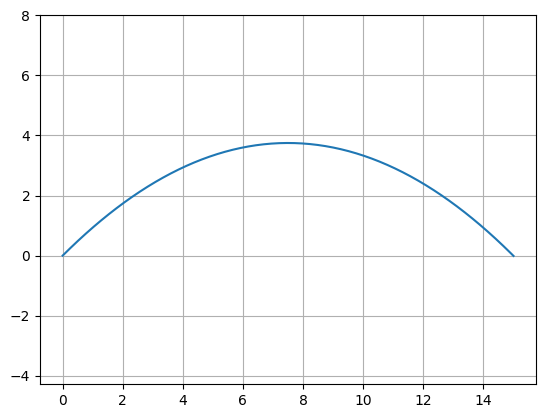

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# const
g = 9.81
t = 0.0
x0 = 0.0
y0 = 0.0
eps = 1E-5
x_val = []
y_val = []

# var
#d_x0 = 10.0
#d_y0 = 10.0
#angle = np.degrees(np.arctan(d_y0 / d_x0))
step = 0.01      # stepping size in milliseconds

v0 = 12.130667354822958
angle = 45.0

u = 2.0 * math.pi * angle / 360.0 
d_x0 = v0 * math.cos(u)
d_y0 = v0 * math.sin(u) 

# start
print("Shooting angle was", angle, "°.")

while(1):
    x = x0 + d_x0 * t
    y = y0 + d_y0 * t - (g/2)*(t**2)

    x_val.append(x)
    y_val.append(y)
    
    if y < eps and t > 0.0:
        print(f"The bullet landed after {t:.3f} seconds and {x:.5f} meters")
        break

    t += step 
    
    if t > 100.0:
        break

plt.plot(x_val, y_val)
plt.axis('equal')
plt.grid()
plt.show()

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from diffType import *
import math
import random

def sim(v0,angle,target):
    u = 2.0 * math.pi * angle / 360.0 
    d_y0 = v0 * u.sin() 
    d_x0 = v0 * u.cos() 
    
    # const
    g = 9.81
    t = 0.0 

    # Manthon Optimierung
    t = 2.0 / g * d_y0
    x = d_x0 * t
    return (target-x)**2

def minimize(v0,ang0,step):
    velo = diffType(v0)
    angle = diffType(ang0)

    eps = 1E-7
    step = 0.001
    count = 0
    
    while(1): 
        count += 1
    
        # Diff after velocity
        velo.dvalue = 1.0
        angle.dvalue = 0.0
        fx = sim(velo, angle,target)
        velo_dval = fx.dvalue
    
        # Diff after angle
        velo.dvalue = 0.0
        angle.dvalue = 1.0
        fx = sim(velo, angle,target)
        angle_dval = fx.dvalue
    
        #Debug
        #if(count % 100):
        #    pass #print(fx.value)
    
        if(fx.value < eps):
            break
    
        # Gradient descent
        velo = velo - step * velo_dval
        angle = angle - step * angle_dval
        

    print(f"To land after exact {target} meter the velocity must be {velo.value:.3f}m/s with an angle of {angle.value:.2f} degrees.")
    print(f"The start values were: velocity = {v0:.2f}m/s | angle = {ang0:.2f} deg")
    print(f"Gradient count was: {count}")
    print("")
    
### init

random.seed()
for i in range(0,10):
    velo = random.uniform(5.0,50.0)
    angle = random.uniform(0.0,90.0)
    target = 20.0 # random.uniform(20.0,100.0)
    
    minimize(velo,angle,target)


To land after exact 20.0 meter the velocity must be 15.242m/s with an angle of 28.81 degrees.
The start values were: velocity = 5.15m/s | angle = 27.62 deg
Gradient count was: 933

To land after exact 20.0 meter the velocity must be 20.627m/s with an angle of 76.27 degrees.
The start values were: velocity = 6.17m/s | angle = 88.42 deg
Gradient count was: 1842

To land after exact 20.0 meter the velocity must be 14.325m/s with an angle of 53.52 degrees.
The start values were: velocity = 21.37m/s | angle = 52.87 deg
Gradient count was: 662

To land after exact 20.0 meter the velocity must be 16.283m/s with an angle of 23.87 degrees.
The start values were: velocity = 8.64m/s | angle = 22.27 deg
Gradient count was: 946

To land after exact 20.0 meter the velocity must be 31.739m/s with an angle of 84.38 degrees.
The start values were: velocity = 33.46m/s | angle = 80.72 deg
Gradient count was: 375

To land after exact 20.0 meter the velocity must be 20.902m/s with an angle of 76.66 degrees